In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
 !pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing dependencies
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict

In [4]:
df= pd.read_csv('/content/drive/MyDrive/capstone project data/Beauty dataset/Beautyy.csv')

In [5]:
def overview(df):
    print('\033[1;36mINITIAL DATASET OVERVIEW\033[0m')
    print('\033[1;3m1. Number of records:\033[0m',df.shape[0])
    print(' — — — — -')
    print('\033[1;3m2. Number of features:\033[0m', df.shape[1])
    print(' — — — — -')
    print('\033[1;3m3. Basic overview:\033[0m')
    print(df.info())
    print(' — — — — -')
    print('\033[1;3m4. Statistical summary:\033[0m\n',df.describe())
    print(' — — — — -')
    print('\033[1;3m5. Data types:\033[0m\n', df.dtypes)
    print(' — — — — -')
    print('\033[1;3m6. First 5 records:\033[0m\n',df.head())
    print(' — — — — -')
    print('\033[1;3m7. Last 5 records:\033[0m\n', df.tail())

In [6]:
overview(df)

INITIAL DATASET OVERVIEW
1. Number of records: 429049
 — — — — -
2. Number of features: 25
 — — — — -
3. Basic overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429049 entries, 0 to 429048
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Product_id      429049 non-null  object 
 1   description     403351 non-null  object 
 2   title           429049 non-null  object 
 3   imUrl           429049 non-null  object 
 4   salesRank       429049 non-null  int64  
 5   categories      429049 non-null  object 
 6   price           429049 non-null  float64
 7   related         429049 non-null  object 
 8   brand           429047 non-null  object 
 9   reviewerID      429049 non-null  object 
 10  reviewerName    429019 non-null  object 
 11  reviewText      428980 non-null  object 
 12  overall         429049 non-null  float64
 13  summary         429046 non-null  object 
 14  unixReviewTime  429049 non-

In [7]:
cat=df.select_dtypes(include="object")                
num=df.select_dtypes(exclude="object") 
a=list(cat.columns)                                    # Creating List of the categorical columns
b=list(num.columns)                                    #creating list of the numerical columns

In [8]:
from tabulate import tabulate
print(tabulate({"categorical":a,"numerical":b},headers=["Categorical","Numerical"]))

Categorical    Numerical
-------------  --------------
Product_id     salesRank
description    price
title          overall
imUrl          unixReviewTime
categories     Helpful
related        Not_helpful
brand          helpful_rate
reviewerID     neg
reviewerName   neu
reviewText     pos
summary        polarity
reviewTime     word_count
sentiment


In [9]:
df.isnull().sum()    #checking null values in dataset

Product_id            0
description       25698
title                 0
imUrl                 0
salesRank             0
categories            0
price                 0
related               0
brand                 2
reviewerID            0
reviewerName         30
reviewText           69
overall               0
summary               3
unixReviewTime        0
reviewTime            0
sentiment             0
Helpful               0
Not_helpful           0
helpful_rate          0
neg                   0
neu                   0
pos                   0
polarity              0
word_count            0
dtype: int64

<font color='sienna'> As we converted the data to csv some empty strings were converted to null values as the number of null values is very less we will drop the values.

In [10]:
df.drop('description',axis=1,inplace=True)

In [11]:
df.dropna(inplace=True) 

In [12]:
df.isnull().sum()    #checking null values in dataset

Product_id        0
title             0
imUrl             0
salesRank         0
categories        0
price             0
related           0
brand             0
reviewerID        0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
sentiment         0
Helpful           0
Not_helpful       0
helpful_rate      0
neg               0
neu               0
pos               0
polarity          0
word_count        0
dtype: int64

## Sweet Report 

In [13]:
!pip install sweetviz
#importing sweetviz and visualizing our data
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('/content/drive/MyDrive/capstone project data/healthcare_sweetviz_report.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/capstone project data/healthcare_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Exploratory Data Analysis


In [14]:
import nltk #for text analysis
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['review_without_stopwords'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head(2)

,Product_id,title,imUrl,salesRank,categories,price,related,brand,reviewerID,reviewerName,...,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count,review_without_stopwords
0,B001HSXTU2,"Revlon Calcium Gel Nail Hardener, 0.5 Ounce",http://ecx.images-amazon.com/images/I/31lrZB5z...,33974,"[['Beauty', 'Skin Care', 'Hands & Nails', 'Nai...",7.49,"{'also_bought': ['B001KYW2OC', 'B004K0HEFA', '...",Revlon,AIS68CKHUUQ3B,MandaLeigh123,...,Negative,2,0,1.00,0.00,0.952,0.048,0.4019,60,decided use base coat si painted nails darker ...
1,B009DU4QYE,"Shampoo for Oily, Itchy &amp; Greasy Hair with...",http://ecx.images-amazon.com/images/I/31a9vMfc...,5126,"[['Beauty', 'Hair Care', 'Shampoos']]",18.00,"{'also_bought': ['B00B5S9CTG', 'B00L1KFQKC', '...",Maple Holistics,A3TXIN5QWZMHCH,S. Garcia,...,Negative,1,3,0.25,0.12,0.823,0.057,-0.8013,96,like shampoo worked least days failed like sha...


In [16]:
#Filtering data
df_pos = df[df['sentiment']=='Positive']
df_neg = df[df['sentiment']=='Negative']
df_neu = df[df['sentiment']=='Neutral']

In [17]:
pos_words = pd.Series(' '.join(df_pos['review_without_stopwords']).lower().split()).value_counts()[:20]
neg_words = pd.Series(' '.join(df_neg['review_without_stopwords']).lower().split()).value_counts()[:20]
neu_words = pd.Series(' '.join(df_neu['review_without_stopwords']).lower().split()).value_counts()[:20]

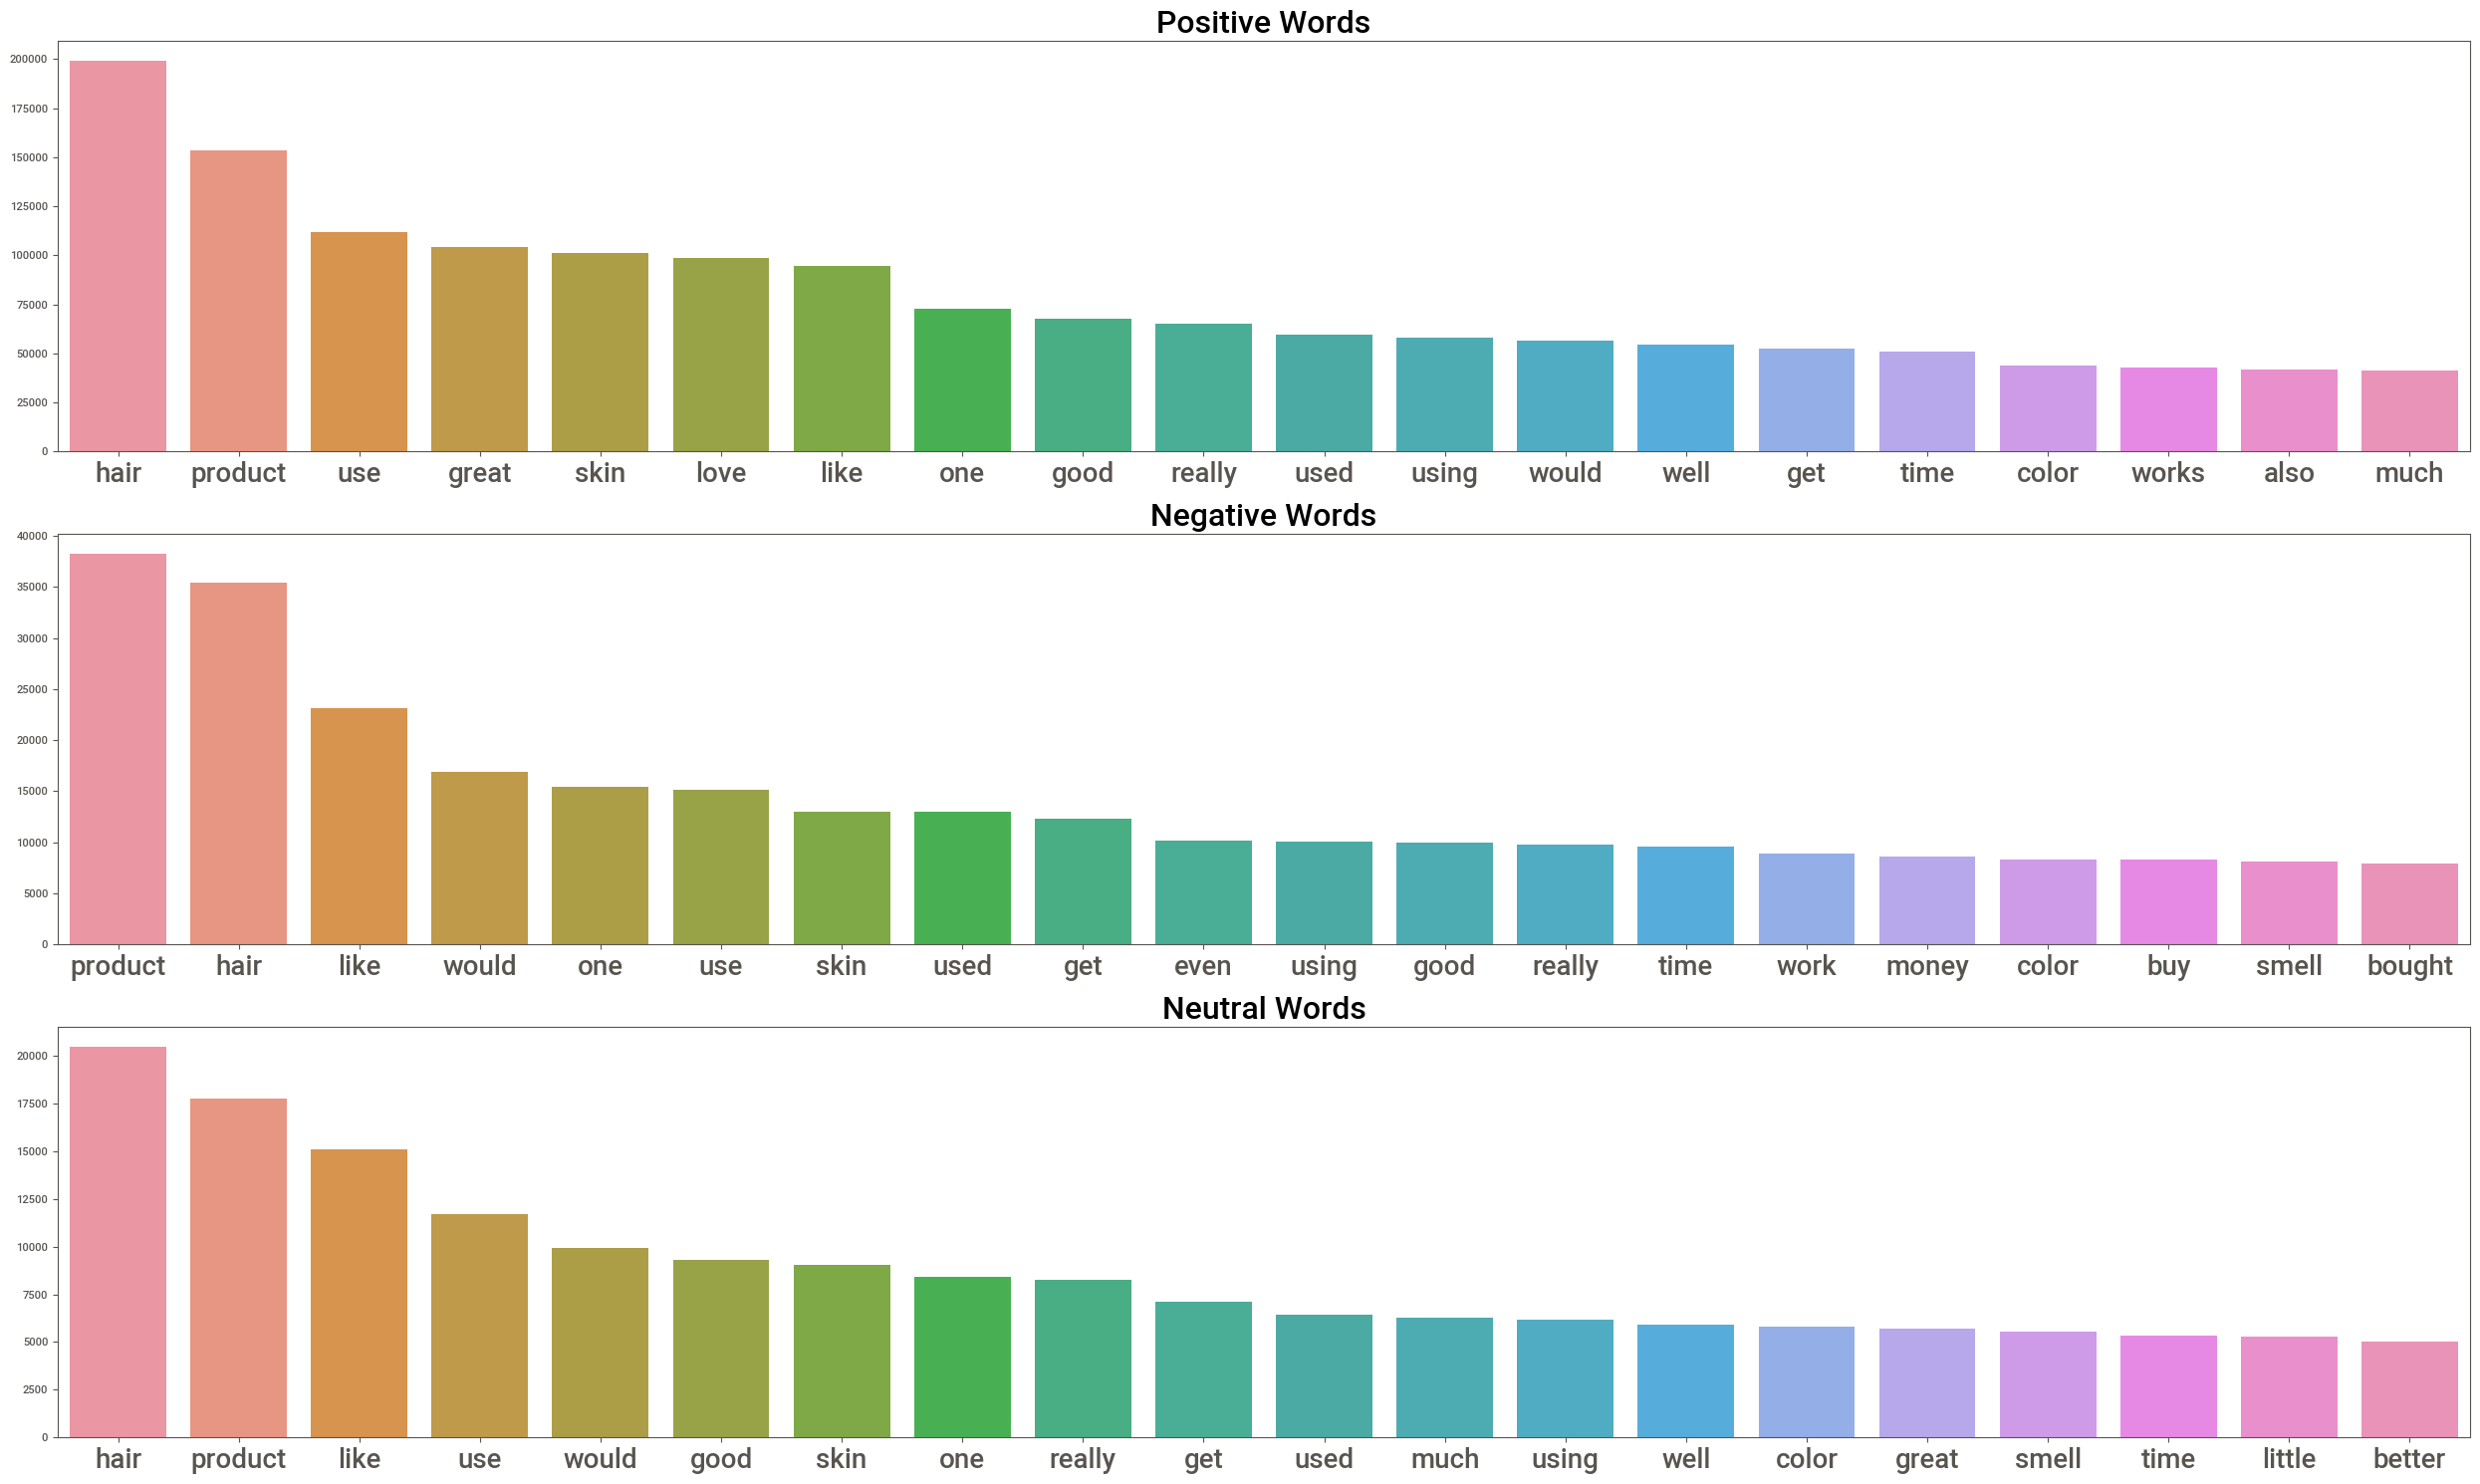

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(25,15))
           
plt.subplot(311)
plt.title('Positive Words',fontsize=23)
sb.barplot(x=pos_words.index ,y = pos_words.values )
plt.xticks(fontsize=20)

plt.subplot(312)
plt.title('Negative Words',fontsize=23)
sb.barplot(x=neg_words.index ,y = neg_words.values )
plt.xticks(fontsize=20)

plt.subplot(313)
plt.title('Neutral Words',fontsize=23)
sb.barplot(x= neu_words.index , y = neu_words.values )
plt.xticks(fontsize=20)

plt.tight_layout()

plt.show()

## <font color='dimgray'>Wordcloud-positive reviews

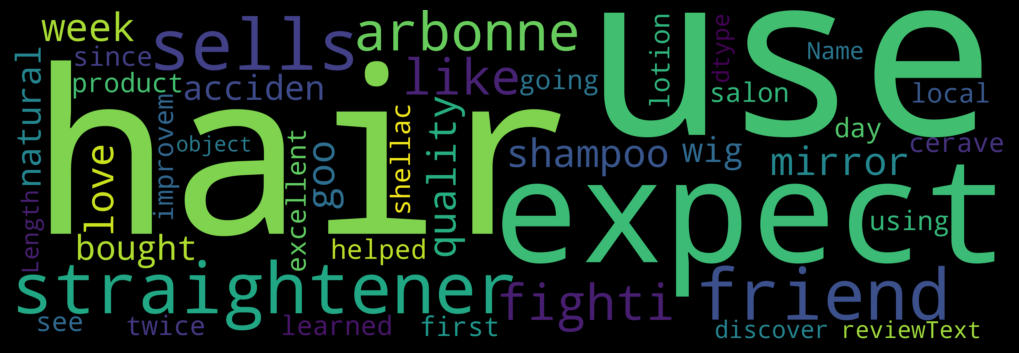

In [19]:
text = df_pos["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 1000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## <font color='dimgray'>Wordcloud-Neutral reviews

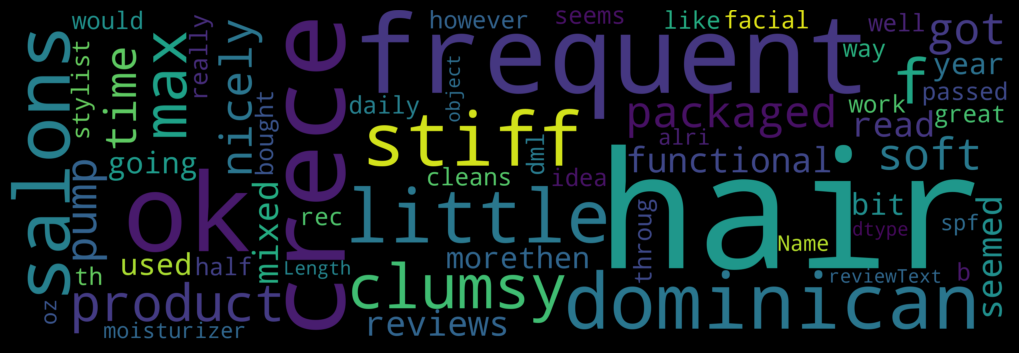

In [20]:
text = df_neu["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 1000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (10,5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## <font color='dimgray'>Wordcloud-Negative reviews

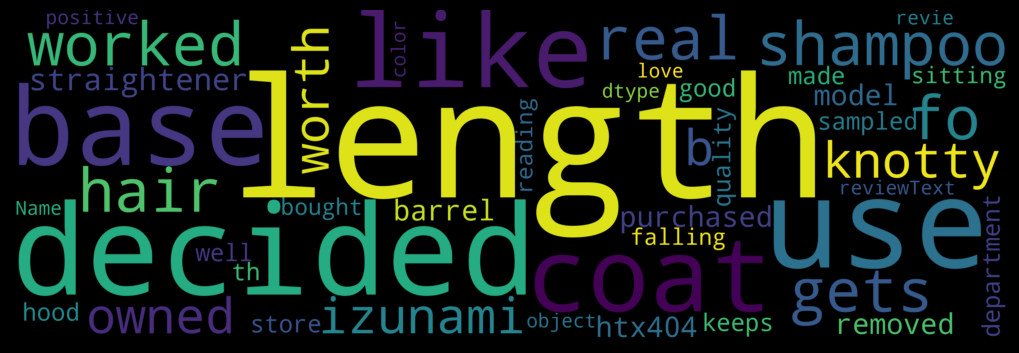

In [21]:
text = df_neg["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 1000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

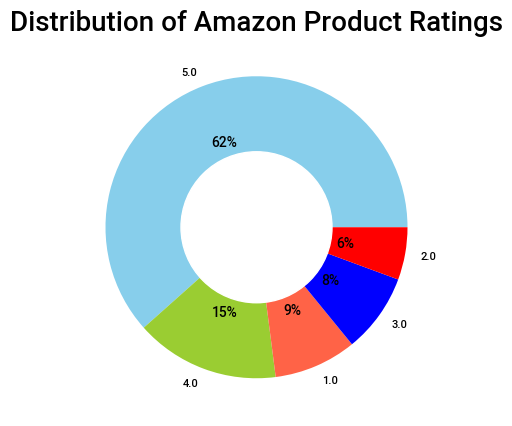

In [22]:
ratings = df["overall"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors,autopct='%1.f%%')
central_circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

Interpretation:
<font color='sienna'> **The overall rating of the product rating that is highest is rating 5.**

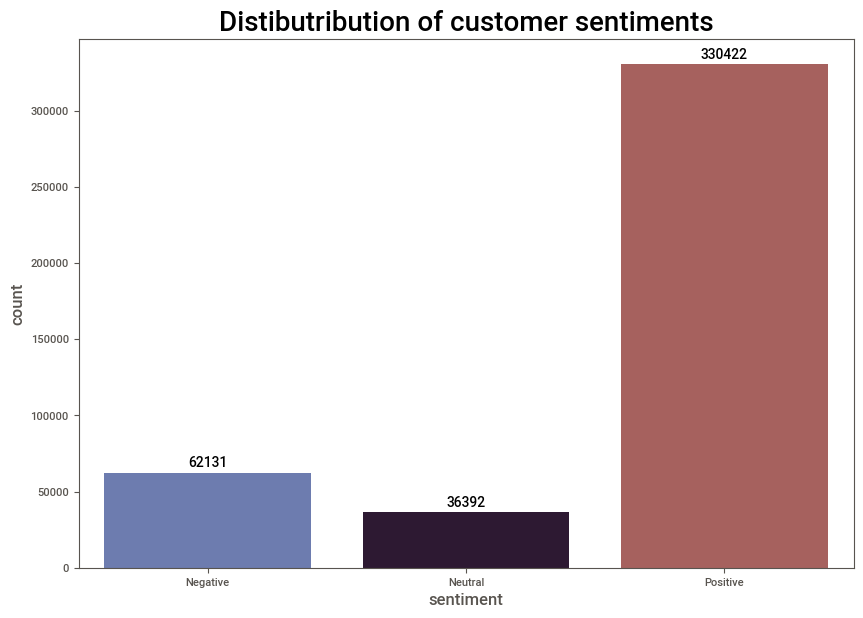

In [23]:
plt.figure(figsize=(10,7))
ax=sns.countplot(df['sentiment'],palette='twilight')
plt.title('Distibutribution of customer sentiments',fontsize=20)
ax.bar_label(ax.containers[0],padding = 2,fontsize=10)
plt.show()

Interpretation:
<font color='sienna'> **Most of the reviews have positive sentiment.**

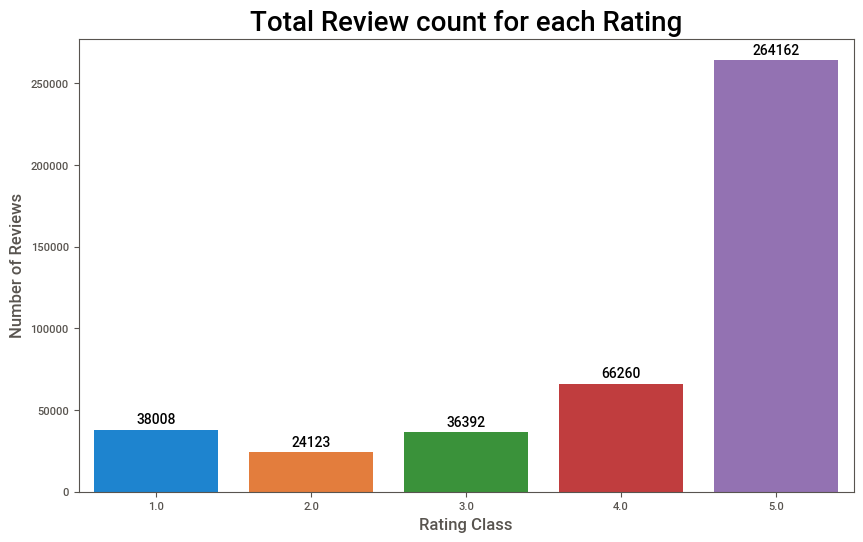

In [24]:
plt.figure(figsize = (10,6))
ax=sns.countplot(df['overall'])
plt.title('Total Review count for each Rating', fontsize=20)
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
ax.bar_label(ax.containers[0],padding = 2,fontsize=10)
plt.show()


Interpretation:
<font color='sienna'> **Most of the reviews have 5 star rating and the number of reviews where the count is less has got rating as 2.**

In [25]:
#grouping the brand as per price
brand_price=df.groupby(by="brand")["price"].mean()
top20_price_brand=brand_price.sort_values(ascending=False)[:20]
last20_price_brand=brand_price.sort_values(ascending=False)[-20:]

In [26]:
last20_price_brand=last20_price_brand.sort_values()

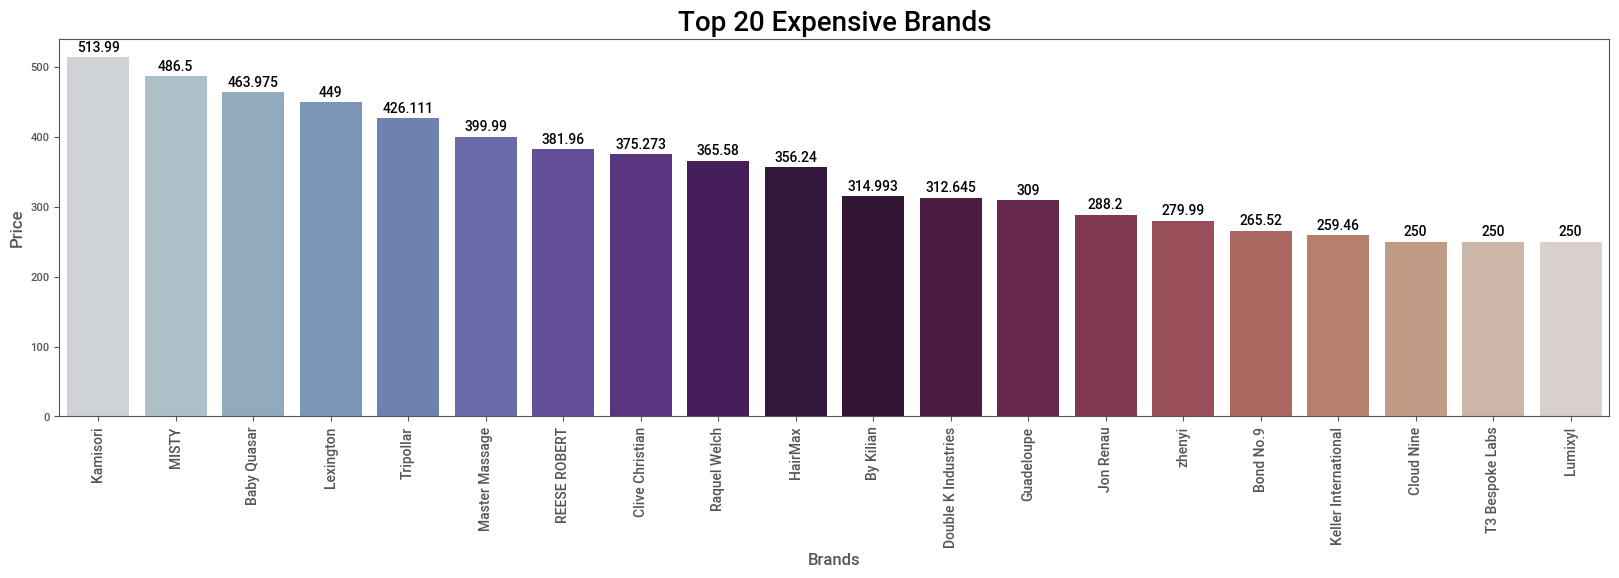

In [27]:
plt.figure(figsize = (20,5))
ax=sns.barplot(top20_price_brand.index,top20_price_brand.values,palette='twilight')
plt.title('Top 20 Expensive Brands', fontsize=20)
plt.xlabel('Brands')
plt.ylabel('Price')
plt.xticks(rotation=90,fontsize=10)
ax.bar_label(ax.containers[0],padding = 2,fontsize=10)
plt.show()

Interpretation:
<font color='sienna'> **Shoprider is the most expensive brand in the health_care dataset.**

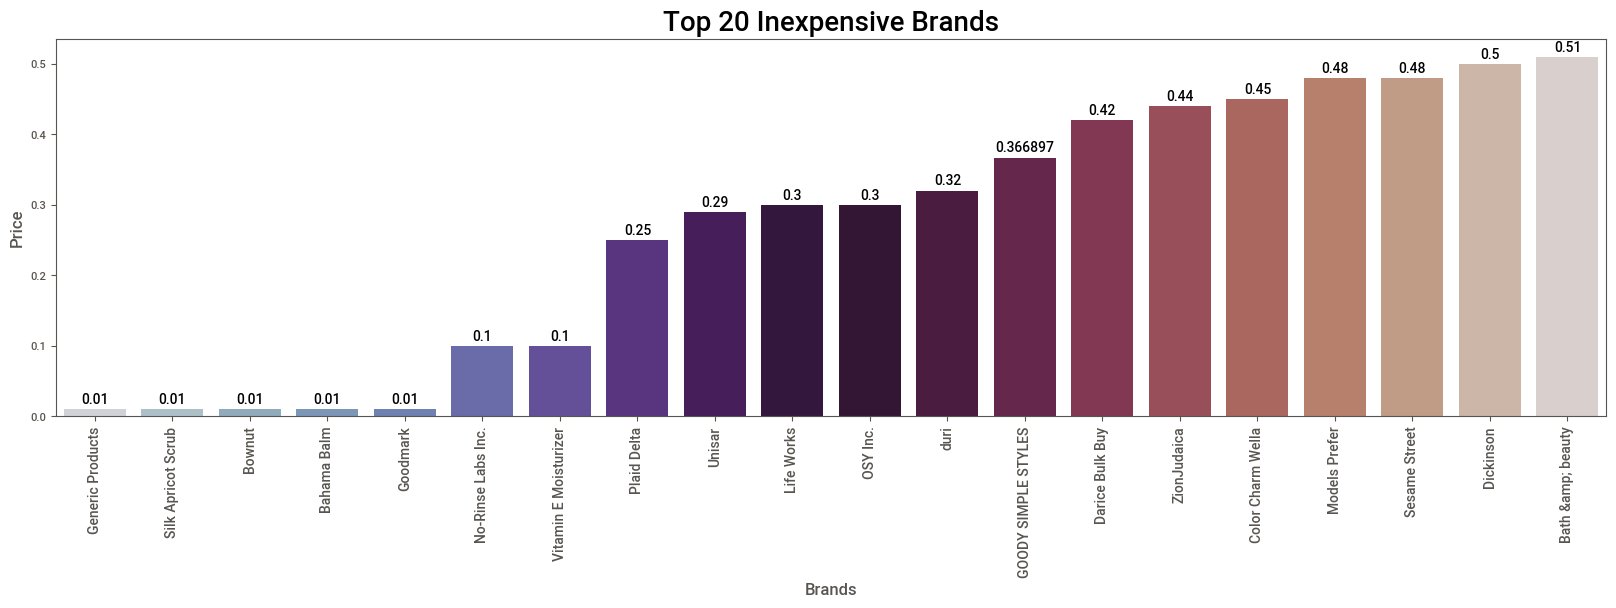

In [28]:
plt.figure(figsize = (20,5))
ax=sns.barplot(last20_price_brand.index,last20_price_brand.values,palette='twilight')
plt.title('Top 20 Inexpensive Brands',fontsize=20)
plt.xlabel('Brands')
plt.ylabel('Price')
plt.xticks(rotation=90,fontsize=10)
ax.bar_label(ax.containers[0],padding = 2,fontsize=10)
plt.show()

Interpretation:
<font color='sienna'> **Millers Forge is the most inexpensive brand in the health_care dataset.**

In [29]:
#converting reviewTime to datetime datatype
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

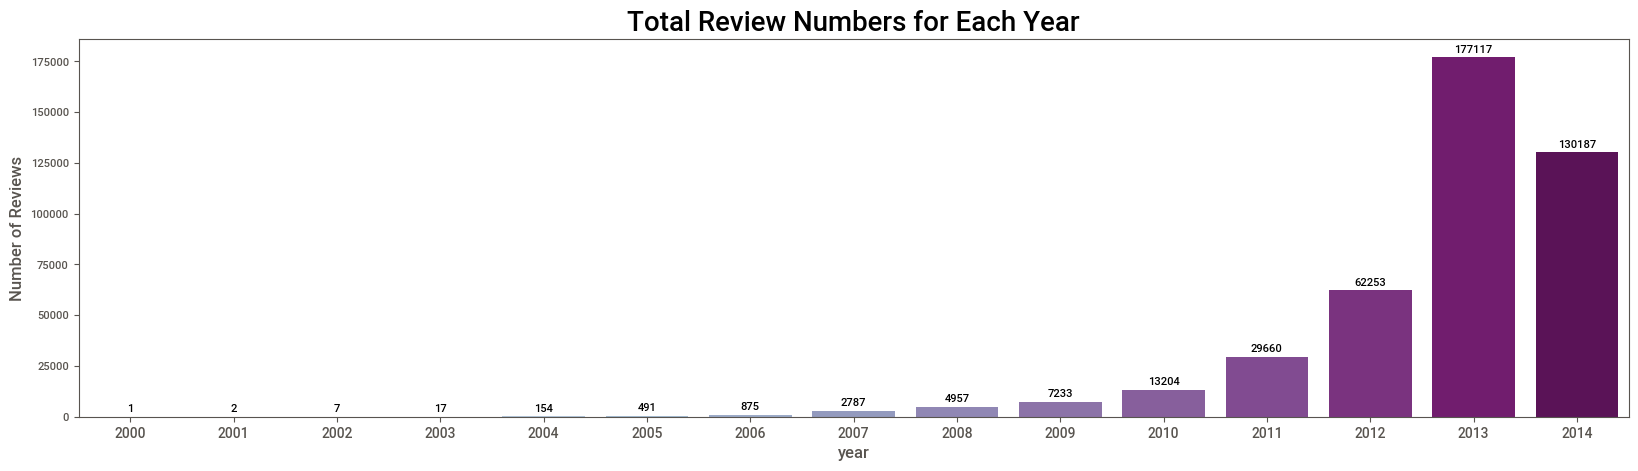

In [30]:
year_cat=df.groupby(by=df['reviewTime'].dt.year)["categories"].count()
plt.figure(figsize = (20,5))
ax=sns.barplot(year_cat.index,year_cat.values,palette="BuPu",errwidth=0)
plt.title('Total Review Numbers for Each Year',fontsize=20)
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.xticks(fontsize=10)
ax.bar_label(ax.containers[0],padding = 2,fontsize=8,fontweight="bold")
plt.show()


Interpretation:
<font color='sienna'> **Maximum review were recieved on the products in the year 2013.**

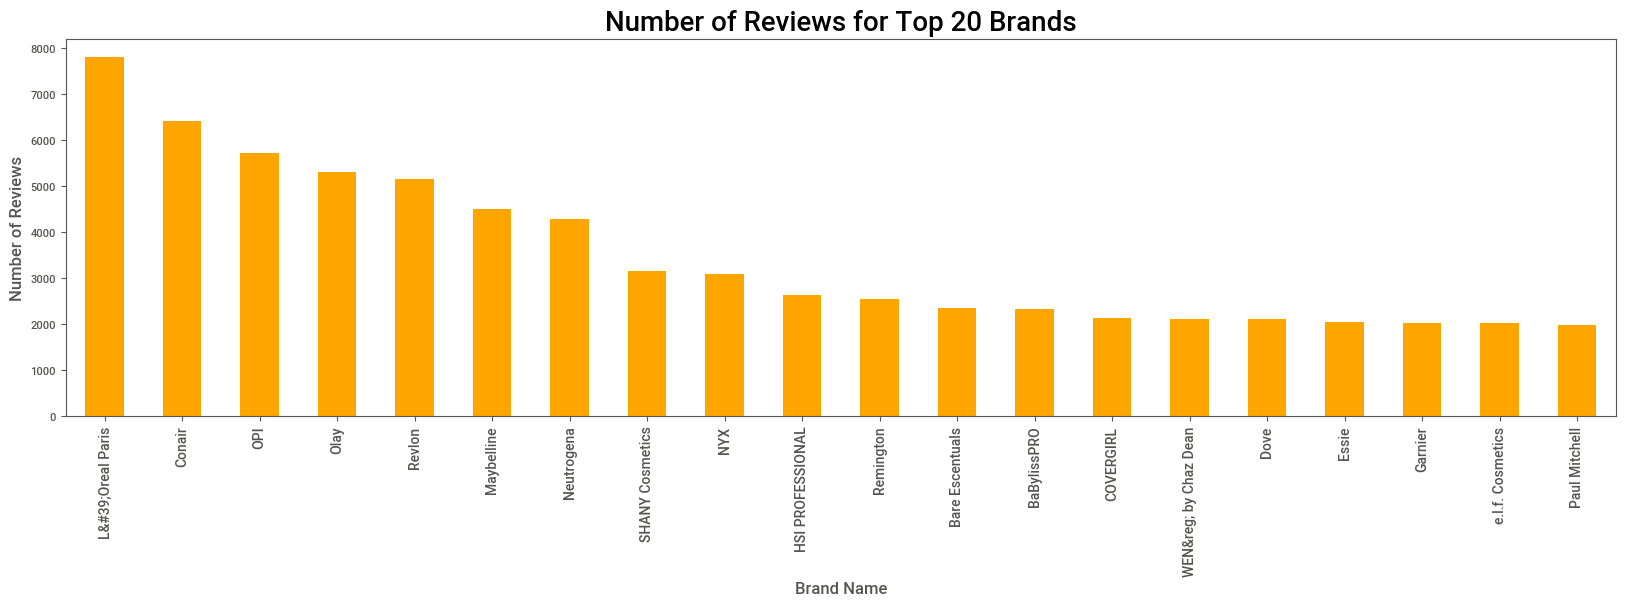

In [31]:
brands = df["brand"].value_counts()
plt.figure(figsize=(20,5))
brands[:20].plot(kind='bar',color='orange')
plt.title("Number of Reviews for Top 20 Brands",fontsize=20)
plt.xlabel('Brand Name')
plt.xticks(fontsize=10)
plt.ylabel('Number of Reviews')
plt.show()

Interpretation:
<font color='sienna'> **Now foods Brand got the highest number of reviews.**

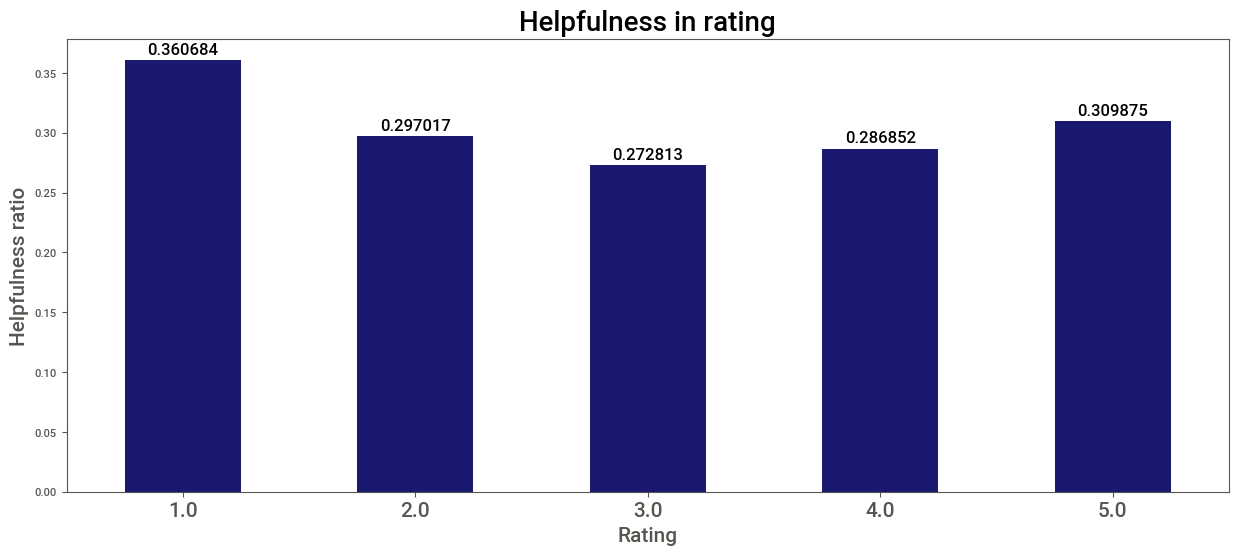

In [32]:
plt.figure(figsize = (15,6))
ax=df.groupby('overall')['helpful_rate'].mean().plot(kind='bar', color= 'midnightblue') 
plt.title("Helpfulness in rating",fontsize=20)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Helpfulness ratio",fontsize=15)
plt.xticks(rotation=0,fontsize=15)
ax.bar_label(ax.containers[0],padding = 2,fontsize=12)
plt.show()

Interpretation:
<font color='sienna'> **Low rating and high rating review was most helpful for customers to buy the products.**

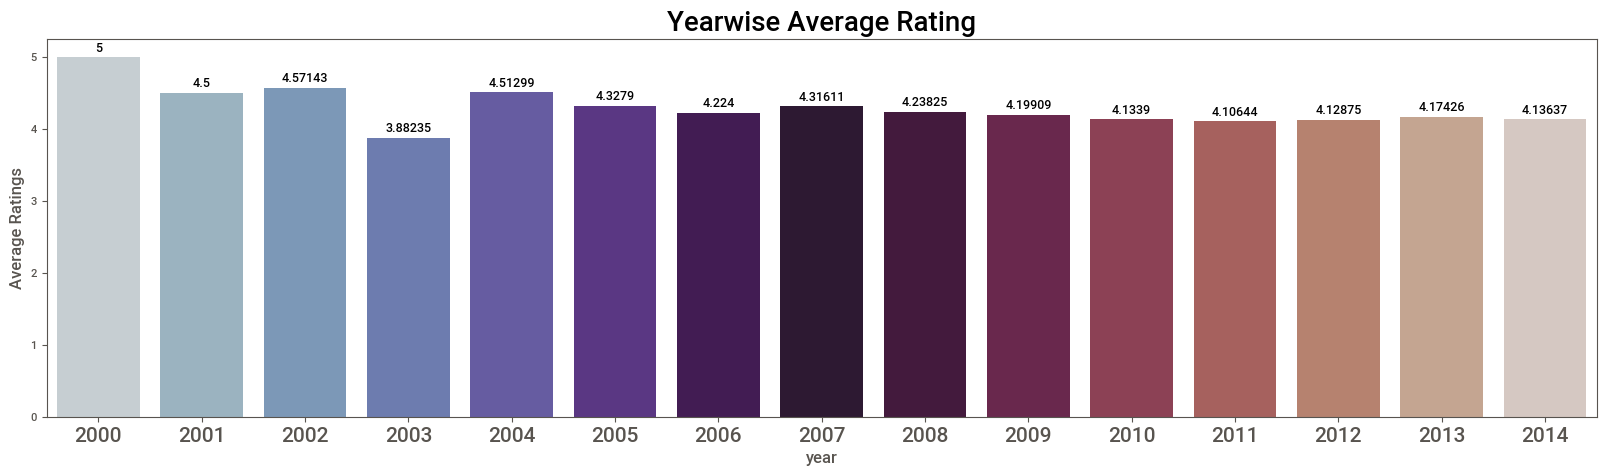

In [33]:
year_overall=df.groupby(by=df["reviewTime"].dt.year)["overall"].mean()
plt.figure(figsize = (20,5))
ax=sns.barplot(year_overall.index,year_overall.values,palette="twilight")
plt.title('Yearwise Average Rating',fontsize=20 )
plt.xlabel('year')
plt.ylabel('Average Ratings')
plt.xticks(fontsize=15)
ax.bar_label(ax.containers[0],padding = 2,fontsize=9)
plt.show()

In [34]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [35]:
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [36]:
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly import tools

In [37]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in df_pos["reviewText"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in df_neu["reviewText"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in df_neg["reviewText"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.8/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [38]:
## Get the bar chart from positive reviews ##
for sent in df_pos["reviewText"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-4])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in df_neu["reviewText"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-4])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in df_neg["reviewText"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-4])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.8/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#<font color='dimgray'><center> End of file</center>

In [39]:
df_neg

,Product_id,title,imUrl,salesRank,categories,price,related,brand,reviewerID,reviewerName,...,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count,review_without_stopwords
0,B001HSXTU2,"Revlon Calcium Gel Nail Hardener, 0.5 Ounce",http://ecx.images-amazon.com/images/I/31lrZB5z...,33974,"[['Beauty', 'Skin Care', 'Hands & Nails', 'Nai...",7.49,"{'also_bought': ['B001KYW2OC', 'B004K0HEFA', '...",Revlon,AIS68CKHUUQ3B,MandaLeigh123,...,Negative,2,0,1.00,0.000,0.952,0.048,0.4019,60,decided use base coat si painted nails darker ...
1,B009DU4QYE,"Shampoo for Oily, Itchy &amp; Greasy Hair with...",http://ecx.images-amazon.com/images/I/31a9vMfc...,5126,"[['Beauty', 'Hair Care', 'Shampoos']]",18.00,"{'also_bought': ['B00B5S9CTG', 'B00L1KFQKC', '...",Maple Holistics,A3TXIN5QWZMHCH,S. Garcia,...,Negative,1,3,0.25,0.120,0.823,0.057,-0.8013,96,like shampoo worked least days failed like sha...
2,B00BPARRTQ,Gorgeous Long Curly Clip-on Hair Extension Wig...,http://ecx.images-amazon.com/images/I/51eRHdeB...,15527,"[['Beauty', 'Hair Care', 'Styling Products', '...",8.49,"{'also_bought': ['B00B1OP00E', 'B00FOLPOY2', '...",wwii101,A17UV8N9SZ6DJV,marisa,...,Negative,0,0,0.00,0.150,0.850,0.000,-0.3673,25,hair gets real knotty worth buying highly disa...
3,B002QHFG3Q,Izunami Izunami 450 Tourmaline Ionic Ceramic F...,http://ecx.images-amazon.com/images/I/31a0Xqt7...,18468,"[['Beauty', 'Hair Care', 'Styling Tools', 'Iro...",109.95,"{'also_bought': ['B005EM5RES', 'B00G71UMYA', '...",Izunami,A226KAHXGTXBQZ,E. Keys,...,Negative,28,5,0.85,0.012,0.876,0.112,0.9551,184,owned izunami straightener half weeks thought ...
4,B001TAIMFA,"Fusion Tools, Gemstone Tourmaline Nanocomplex ...",http://ecx.images-amazon.com/images/I/31MexW5x...,326362,"[['Beauty', 'Hair Care', 'Styling Tools', 'Iro...",32.99,"{'also_viewed': ['B0016N2T1S', 'B000ULFT0U', '...",Fusion Tools,A3URC0E81RQ64G,"LlamaMama ""julia""",...,Negative,0,0,0.00,0.047,0.859,0.094,0.6622,113,purchased barrel model htx404 removed box pack...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62149,B0020MMCZW,Fancy by Jessica Simpson for Women. Eau De Par...,http://ecx.images-amazon.com/images/I/41g8kKBl...,57627,"[['Beauty', 'Skin Care', 'Body', 'Moisturizers...",18.03,"{'also_bought': ['B0072CXAPG', 'B003XLX046', '...",Jessica Simpson,A2DJ0WR6BRW5PG,BILLYN MAULTSBY,...,Negative,0,0,0.00,0.000,0.772,0.228,0.8770,44,sampled department store remember smelling sso...
62150,B004WN2HZ2,Body Toolz Ingrown Toe Nail Kit,http://ecx.images-amazon.com/images/I/412tlAFR...,9363,"[['Beauty', 'Tools & Accessories', 'Nail Tools...",25.89,"{'also_bought': ['B0009EIMSE', 'B0011E1IVE', '...",Body Toolz,A13WJT1TH5WSLD,Stacy McIntyre,...,Negative,0,0,0.00,0.435,0.565,0.000,-0.8304,21,good quality made well good value would recomm...
62151,B0092MCMM6,"Laila Ali LADR5603 Salon Ionic Dryer, Purple a...",http://ecx.images-amazon.com/images/I/41wp4hDY...,1896,"[['Beauty', 'Hair Care', 'Styling Tools', 'Hai...",47.60,"{'also_bought': ['B001441X9I', 'B00IUOLO80', '...",Laila Ali,A2X6ZUP6K6RU2D,Magdala,...,Negative,0,0,0.00,0.124,0.876,0.000,-0.4767,33,hood keeps falling sitting dryer made difficul...
62152,B0009DT39W,Panasonic EH2351AC Heated Eyelash Curling Wand,http://ecx.images-amazon.com/images/I/21igNvz7...,5468,"[['Beauty', 'Tools & Accessories', 'Makeup Bru...",17.81,"{'also_bought': ['B001CS6BIY', 'B00LVS18CE', '...",Panasonic,A21RVRG6IOAZ9X,LozanoLL,...,Negative,0,0,0.00,0.199,0.742,0.059,-0.6705,35,bought reading positive reviews sadly work thi...


In [42]:
df_neg.to_csv('/content/drive/MyDrive/capstone project data/Beauty_neg.csv',index=False)